In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import fitsio as ft
import numpy as np

In [3]:
plt.rc('font', size=20)

In [5]:
ls /home/mehdi/data/eboss/v7_2/v0.0/pk*

/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_512.json
/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_nosysweight_512.json
/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_wnnz_ablation_512.json
/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_wnnz_known_512.json
/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_wnnz_plain_512.json


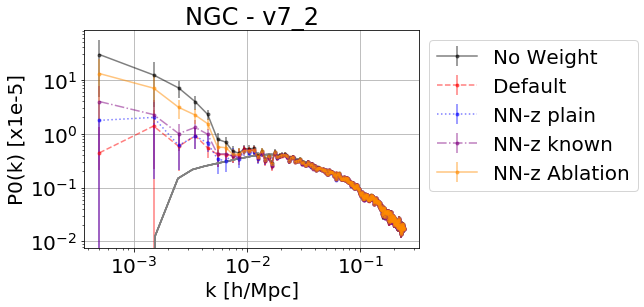

In [14]:
path  = '/home/mehdi/data/eboss/v7_2/v0.0/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['No Weight', 'Default', 'NN-z plain', 'NN-z known', 'NN-z Ablation']
mk    = ['.', '.', '.', '.', '.']
c     = ['k', 'r', 'b', 'purple', 'darkorange']
ls    = 2*['-', '--', ':', '-.']

for i,branch in enumerate(['v7_2_nosysweight', 'v7_2', 'v7_2_wnnz_plain','v7_2_wnnz_known', 'v7_2_wnnz_ablation']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

# plt.ylim(-0.5, 2.)    
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.,1.))
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC - v7_2')
plt.xlabel('k [h/Mpc]')
plt.grid()
plt.savefig('kpkv7_2.png', dpi=300, bbox_inches='tight')

In [ ]:
ls /home/mehdi/data/eboss/v7_1/results_NGC/pk_NGC_systot_512.json

In [28]:
path = '/home/mehdi/data/eboss/'
def read(file):
    global path
    kpk = nb.ConvolvedFFTPower.load(file)
    err = kpk.poles['power_0'].real/(0.5*kpk.poles['modes'])**0.5
    return kpk.poles.coords['k'], kpk.poles['power_0'].real-kpk.attrs['shotnoise'], err

w71 = read('/home/mehdi/data/eboss/v7_1/results_NGC/pk_NGC_systot_512.json')
w72 = read('/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_512.json')

w71n = read('/home/mehdi/data/eboss/v7/results_NGC_all/pk_NGC_v7_wnnz_plain256more_512.json')
w72n = read('/home/mehdi/data/eboss/v7_2/v0.0/pk_NGC_v7_2_wnnz_plain_512.json')

Text(0, 0.5, '[$P_{v7_{2}}-P_{v7_{1}}$]/$\\sigma P_{v7_{1}}$')

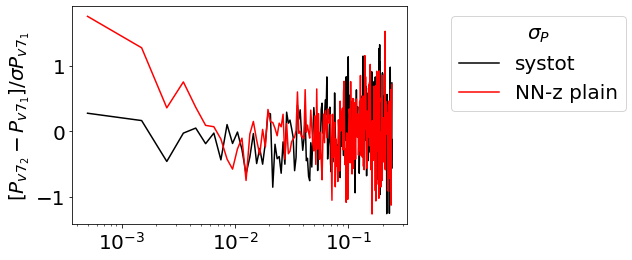

In [29]:
plt.plot(w71[0],  (w72[1]-w71[1])/w71[2],'k',
         w71n[0],  (w72n[1]-w71n[1])/w71n[2],'r')
         #w71[0], (wnnzp[1]-wnnzp6[1])/w71[2], 'r')
plt.legend(['systot', 'NN-z plain'],
          bbox_to_anchor=(1.1, 1.),
          title=r'$\sigma_{P}$')
plt.xscale('log')
plt.ylabel(r'[$P_{v7_{2}}-P_{v7_{1}}$]/$\sigma P_{v7_{1}}$')

Text(0.5, 1.0, 'NGC')

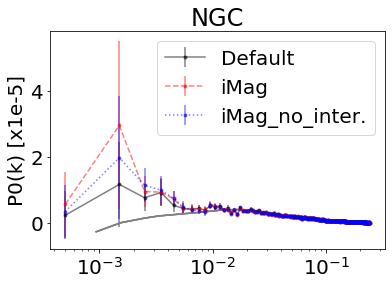

In [3]:
path  = '/home/mehdi/data/eboss/v7_1/results_NGC/'
pkout = lambda hemi, branch : 'pk_'+hemi+'_'+branch+'_512.json'

hemi  = 'NGC'
ttl   = ['Default', 'iMag', 'iMag_no_inter.']
mk    = ['.', '.', '.']
c = ['k', 'r', 'b']
ls = ['-', '--', ':']
for i,branch in enumerate(['systot', 'systot0.1', 'systot0.2']):
    pk_i = nb.ConvolvedFFTPower.load(path + pkout(hemi, branch))
    err = 1.e-5*pk_i.poles['power_0'].real/(0.5*pk_i.poles['modes'])**0.5
    plt.errorbar(pk_i.poles.coords['k'], 1.e-5*(pk_i.poles['power_0'].real-pk_i.attrs['shotnoise']),
                yerr=err,label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+hemi+'_av.txt', usecols=(0, 1))
    plt.plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')

#plt.ylim(-0.5, 2.)    
plt.legend()
plt.xscale('log')
plt.ylabel('P0(k) [x1e-5]')
plt.title('NGC')

In [1]:
2*3

6